<a href="https://colab.research.google.com/github/ruchidhore12/COEN-344-Computer-Vision-I/blob/main/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Canny Edge Detector | Sobel Filter | Ruchi Manikrao Dhore | W1652116

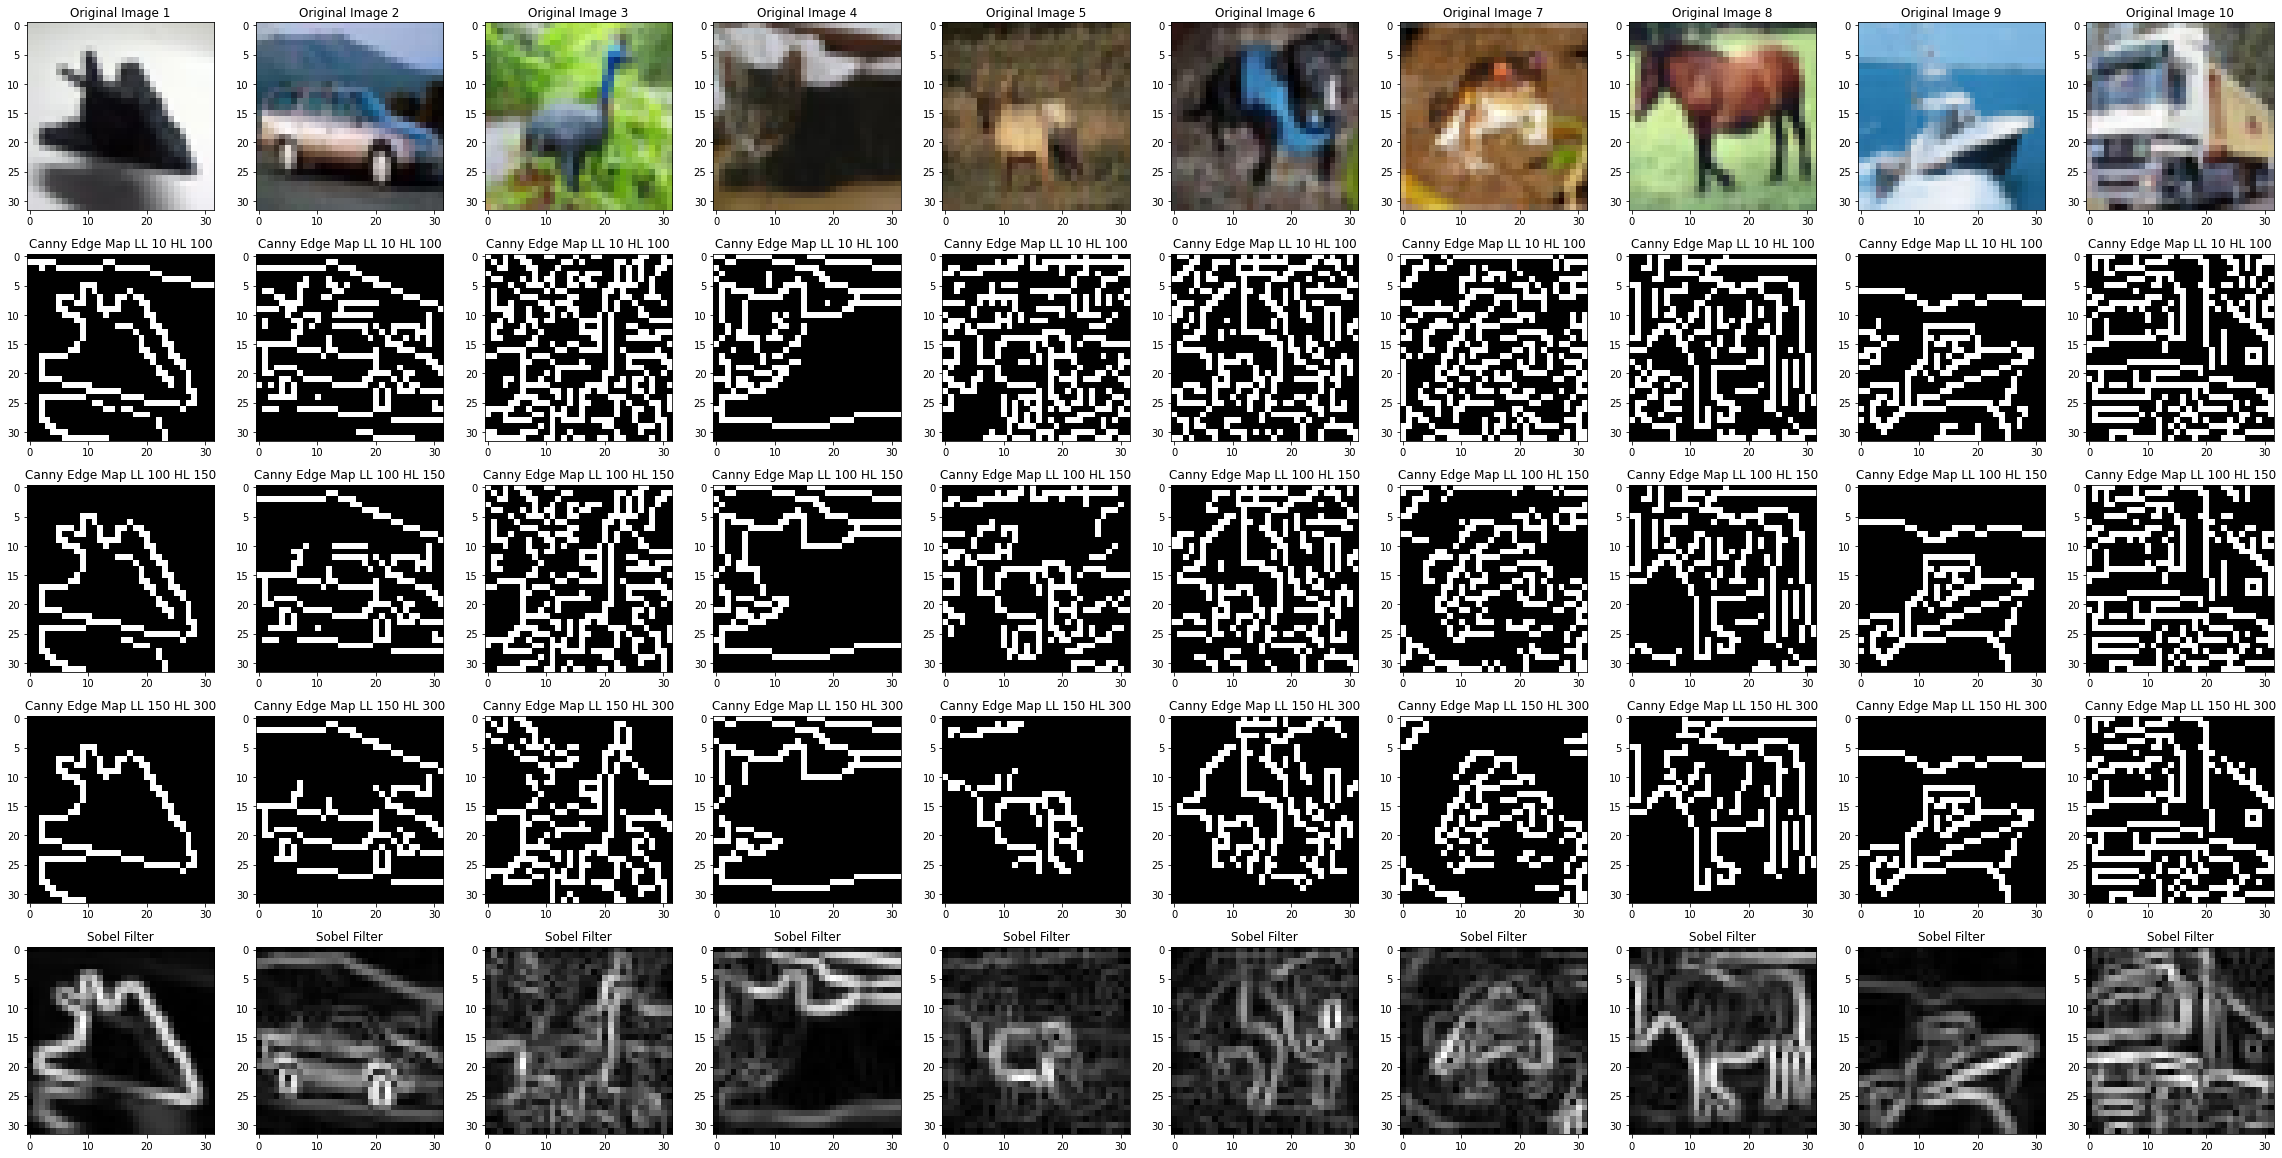

In [4]:
import cv2
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt

input_range = 10

# To store images from cifar10 10 classes
input_image_dataset = []

# To load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# To get the first image from every class in the training set
for i in range(input_range):
  first_image_index = next((index for index, label in enumerate(y_train) if label[0] == i), None)
  input_image_dataset.append(x_train[first_image_index])

# To plot original images
figure = plt.figure(figsize = (32, 32))
figure.tight_layout()

for i in range(input_range):
  plt.subplot(10, 10, i + 1)
  plt.imshow(input_image_dataset[i])
  plt.title("Original Image " + str(i+1))

# To calculate canny edge map
def canny_edge_detector(image, low_threshold = 10, high_threshold = 100):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  canny_edge_map = cv2.Canny(gray, low_threshold, high_threshold)
  return canny_edge_map

# To plot canny edge map
def plot(canny_edge_map, index = 10, low_threshold = 10, high_threshold = 100):
  plt.subplot(10, 10, (i + 1) + index)
  figure.tight_layout()
  plt.imshow(canny_edge_map, cmap = 'gray')
  plt.title("Canny Edge Map LL {} HL {}".format(str(low_threshold), str(high_threshold)))

# To calculate sobel filter map and plot it
def sobel_filter_and_plot(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 3)
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 3)
  sobel_filter = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
  plt.subplot(10, 10, (i + 1) + 40)
  figure.tight_layout()
  plt.imshow(sobel_filter, cmap = 'gray')
  plt.title("Sobel Filter")

# To provoke canny edge detector with different threshold values and sobel filter
for i in range(input_range):
  canny_edge_map = canny_edge_detector(input_image_dataset[i], 10, 100)
  plot(canny_edge_map, 10, 10, 100)
  canny_edge_map = canny_edge_detector(input_image_dataset[i], 100, 150)
  plot(canny_edge_map, 20, 100, 150)
  canny_edge_map = canny_edge_detector(input_image_dataset[i], 150, 300)
  plot(canny_edge_map, 30, 150, 300)
  sobel_filter_and_plot(input_image_dataset[i])
